In [69]:
%load_ext autoreload
%autoreload 2

import numpy as np
from srf.simulation import SimulationParams, generate_simulation_data
from srf.plotting import plot_simulation, plot_images_from_embedding, plot_tri_factors
from srf.models import TrifactorCD
from srf.rank_selection_cv import run_cv_rank_selection
from srf.utils import CVParams
from srf.datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Generating membership matrix with 30 samples and 5 clusters


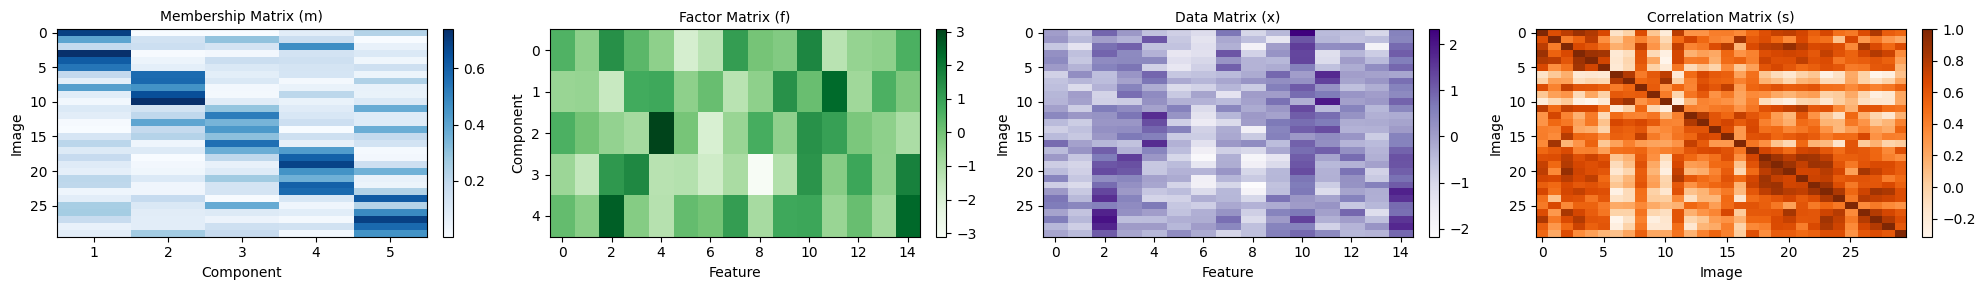

In [160]:
params = SimulationParams()
params.n = 30
params.p = 15
params.primary_concentration = 5.0
params.k = 5
params.snr = 0.7

x, m, f, s = generate_simulation_data(params)
fig = plot_simulation(x, m, f, s)

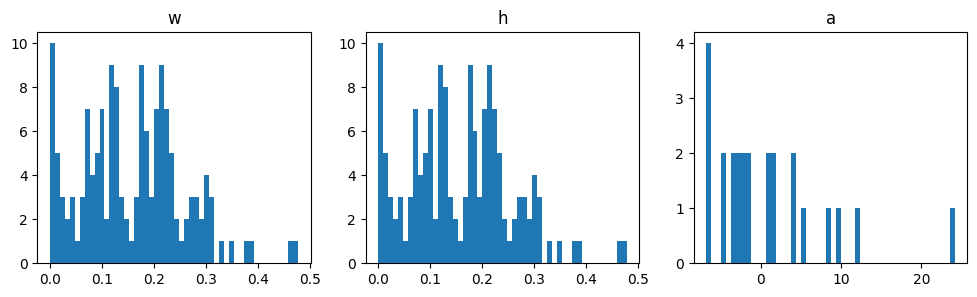

In [162]:
model = TrifactorCD(max_iter=300, rank=params.k, alpha=1.0, verbose=True, tol=1e-8)
model.fit(s)
plot_tri_factors(model)
plt.show()

### Cholesky Decomposition to check if w and h are similar to a

In [167]:
# we solve a^2 = wah
l = np.linalg.cholesky(model.a_)
wl = model.w_ @ l
hl = model.h_ @ l
wah = wl @ hl.T
print(np.linalg.norm(s - wah))

1.771704286059898


### Behavioral Embedding Decomposition

### Rank Selection (optimal dimensionality)

TODOs
 
- Show variance across folds
- Think about projection mapping and correct masking

Running 175 tasks with 100 jobs


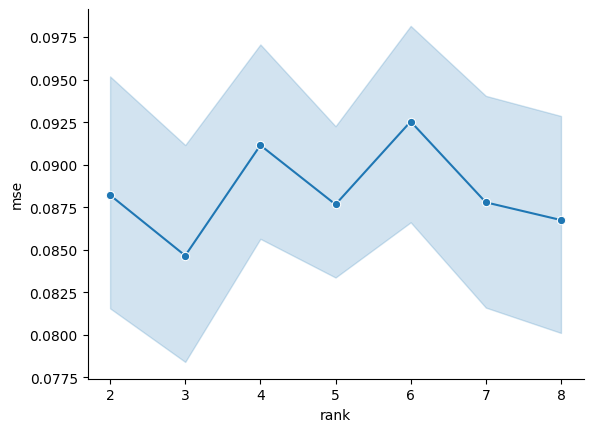

In [18]:
cv_params = CVParams()
model.verbose = False
cv_params.verbose = 0
cv_params.candidate_ranks = range(2, 9)
df = run_cv_rank_selection(
    model,
    s,
    cv_params.candidate_ranks,
    n_repeats=cv_params.n_repeats,
    n_splits=cv_params.n_splits,
    random_state=cv_params.random_state,
    verbose=cv_params.verbose,
)
sns.lineplot(df, x="rank", y="mse", marker="o")
sns.despine()
plt.show()